In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

movies = pd.read_csv('D:\XL Academy\Python\Python Work\Python Project\DataMiningAnalytics DIY Project\Movies.csv',encoding = 'latin-1',on_bad_lines = 'skip')
users=  pd.read_csv('D:\\XL Academy\\Python\\Python Work\\Python Project\\DataMiningAnalytics DIY Project\\Users.csv')
ratings= pd.read_csv('D:\XL Academy\Python\Python Work\Python Project\DataMiningAnalytics DIY Project\Ratings.csv',encoding = 'latin-1',on_bad_lines = 'skip')



<>:6: SyntaxWarning: invalid escape sequence '\X'
<>:8: SyntaxWarning: invalid escape sequence '\X'
<>:6: SyntaxWarning: invalid escape sequence '\X'
<>:8: SyntaxWarning: invalid escape sequence '\X'
C:\Users\rs444\AppData\Local\Temp\ipykernel_8776\3333797661.py:6: SyntaxWarning: invalid escape sequence '\X'
  movies = pd.read_csv('D:\XL Academy\Python\Python Work\Python Project\DataMiningAnalytics DIY Project\Movies.csv',encoding = 'latin-1',on_bad_lines = 'skip')
C:\Users\rs444\AppData\Local\Temp\ipykernel_8776\3333797661.py:8: SyntaxWarning: invalid escape sequence '\X'
  ratings= pd.read_csv('D:\XL Academy\Python\Python Work\Python Project\DataMiningAnalytics DIY Project\Ratings.csv',encoding = 'latin-1',on_bad_lines = 'skip')


In [17]:
movies.shape
# users.shape
# ratings.shape

(3883, 5)

In [ ]:
# Extract the year from the title

movies['Year'] = movies['Title'].str.extract(r'\((\d{4})\)',expand=False)
movies
movies['Year'] = pd.to_numeric(movies['Year'], errors= 'coerce')
movies.dropna(subset=['Year'],inplace= True)
movies['Year']=movies['Year'].astype(int)
movies

,MovieID,Title,Category,Unnamed: 3,Unnamed: 4,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,NaN,NaN,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,NaN,NaN,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,NaN,NaN,1995
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN,1995
...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,NaN,NaN,2000
3879,3949,Requiem for a Dream (2000),Drama,NaN,NaN,2000
3880,3950,Tigerland (2000),Drama,NaN,NaN,2000
3881,3951,Two Family House (2000),Drama,NaN,NaN,2000


In [24]:
# prompt: movies['Year'] distinct values

# Display distinct years
print(movies['Category'].unique())

["Animation|Children's|Comedy" "Adventure|Children's|Fantasy"
 'Comedy|Romance' 'Comedy|Drama' 'Comedy' 'Action|Crime|Thriller'
 "Adventure|Children's" 'Action' 'Action|Adventure|Thriller'
 'Comedy|Drama|Romance' 'Comedy|Horror' "Animation|Children's" 'Drama'
 'Action|Adventure|Romance' 'Drama|Thriller' 'Drama|Romance' 'Thriller'
 'Action|Comedy|Drama' 'Crime|Drama|Thriller' 'Drama|Sci-Fi' 'Romance'
 'Adventure|Sci-Fi' 'Adventure|Romance' "Children's|Comedy|Drama"
 'Documentary' 'Drama|War' 'Action|Crime|Drama' 'Action|Adventure'
 'Crime|Thriller' "Animation|Children's|Musical|Romance"
 'Action|Drama|Thriller' "Children's|Comedy" 'Drama|Mystery'
 'Sci-Fi|Thriller' 'Action|Comedy|Crime|Horror|Thriller' 'Drama|Musical'
 'Crime|Drama|Romance' 'Adventure|Drama' 'Action|Thriller'
 "Adventure|Children's|Comedy|Musical" 'Action|Drama|War'
 'Action|Adventure|Crime' 'Crime' 'Drama|Mystery|Romance' 'Action|Drama'
 'Drama|Romance|War' 'Horror' 'Action|Adventure|Comedy|Crime' 'Comedy|War'
 'Action

In [26]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3719 entries, 0 to 3882
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MovieID     3719 non-null   int64 
 1   Title       3719 non-null   object
 2   Category    3719 non-null   object
 3   Unnamed: 3  0 non-null      object
 4   Unnamed: 4  0 non-null      object
 5   Year        3719 non-null   int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 188.9+ KB


In [94]:
# Split the category column into multiple rows
movies=movies.assign(Category = movies['Category'].str.split('|')).explode('Category')
movies

# Calculate the number of movies released per year
movies_per_year=movies.groupby('Year').size().reset_index(name = 'Count')
print(movies_per_year)

    Year  Count
0   1919      3
1   1920      2
2   1921      1
3   1922      2
4   1923      3
..   ...    ...
76  1996    516
77  1997    508
78  1998    548
79  1999    414
80  2000    235

[81 rows x 2 columns]


In [28]:
movies_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    81 non-null     int32
 1   count   81 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 1.1 KB


In [73]:
merged = ratings.merge(movies, on='MovieID')
highest_rate_per_year = merged.groupby(['Year','Category'])['Rating'].mean().reset_index()
highest_rate_per_year = highest_rate_per_year.loc[highest_rate_per_year.groupby(['Year'])['Rating'].idxmax()]
highest_rate_per_year

,Year,Category,Rating
1,1919,Comedy,3.631579
3,1920,Comedy,3.666667
4,1921,Action,3.790323
5,1922,Horror,3.991597
6,1923,Comedy,3.444444
...,...,...,...
813,1996,Documentary,4.070608
834,1997,Film-Noir,4.171815
858,1998,War,3.918526
862,1999,Animation,4.013039


In [78]:
merged = ratings.merge(movies, on='MovieID')
highest_rated_category=merged.groupby('Category')['Rating'].mean().sort_values(ascending=False)
highest_rated_category

Category
Film-Noir      4.075188
Documentary    3.961528
War            3.878758
Drama          3.761494
Crime          3.698460
Animation      3.691294
Musical        3.666401
Mystery        3.657400
Western        3.637770
Romance        3.603506
Thriller       3.582175
Comedy         3.534755
Action         3.489475
Fantasy        3.474930
Adventure      3.460581
Children's     3.455279
Sci-Fi         3.433917
Horror         3.285543
Name: Rating, dtype: float64

In [81]:
merged = ratings.merge(movies, on='MovieID').merge(users,on='UserID')

age_group_like=merged.groupby(['Age','Category']).size().reset_index(name='Count')
age_group_like=age_group_like.loc[age_group_like.groupby('Age')['Count'].idxmax()].reset_index()
age_group_like

,index,Age,Category,Count
0,4,1,Comedy,10718
1,22,18,Comedy,67354
2,40,25,Comedy,138998
3,61,35,Drama,69770
4,79,45,Drama,31337
5,97,50,Drama,28535
6,115,56,Drama,16880


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


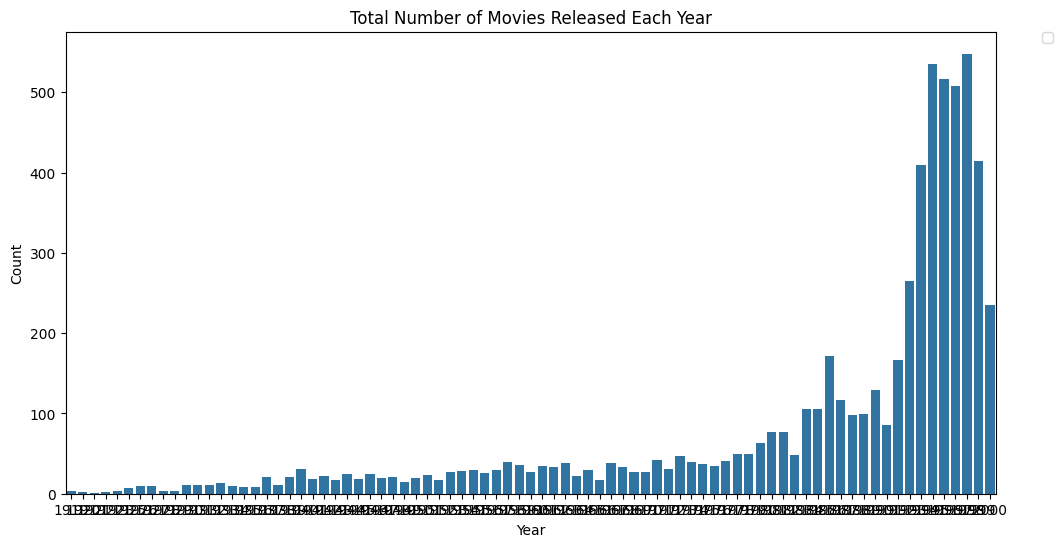

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot total number of movies released each year
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
sns.barplot(data=movies_per_year, x='Year', y='Count')
plt.title('Total Number of Movies Released Each Year')

# Dynamically position the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

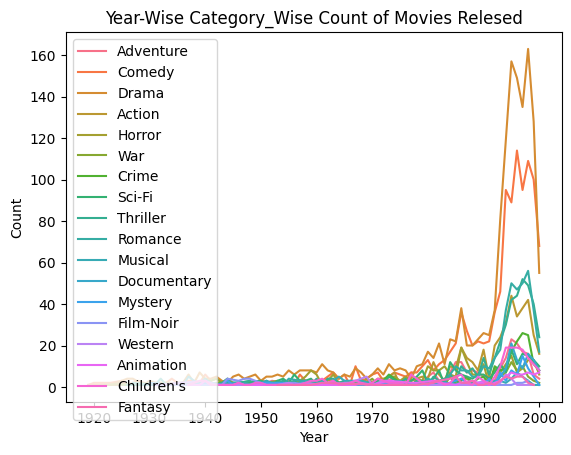

In [97]:
year_category_count = movies.groupby(['Year','Category']).size().reset_index(name='Count')

sns.lineplot(data=year_category_count, x = 'Year',y='Count',hue='Category')
plt.title("Year-Wise Category_Wise Count of Movies Relesed")
plt.legend(loc='upper left')
plt.show

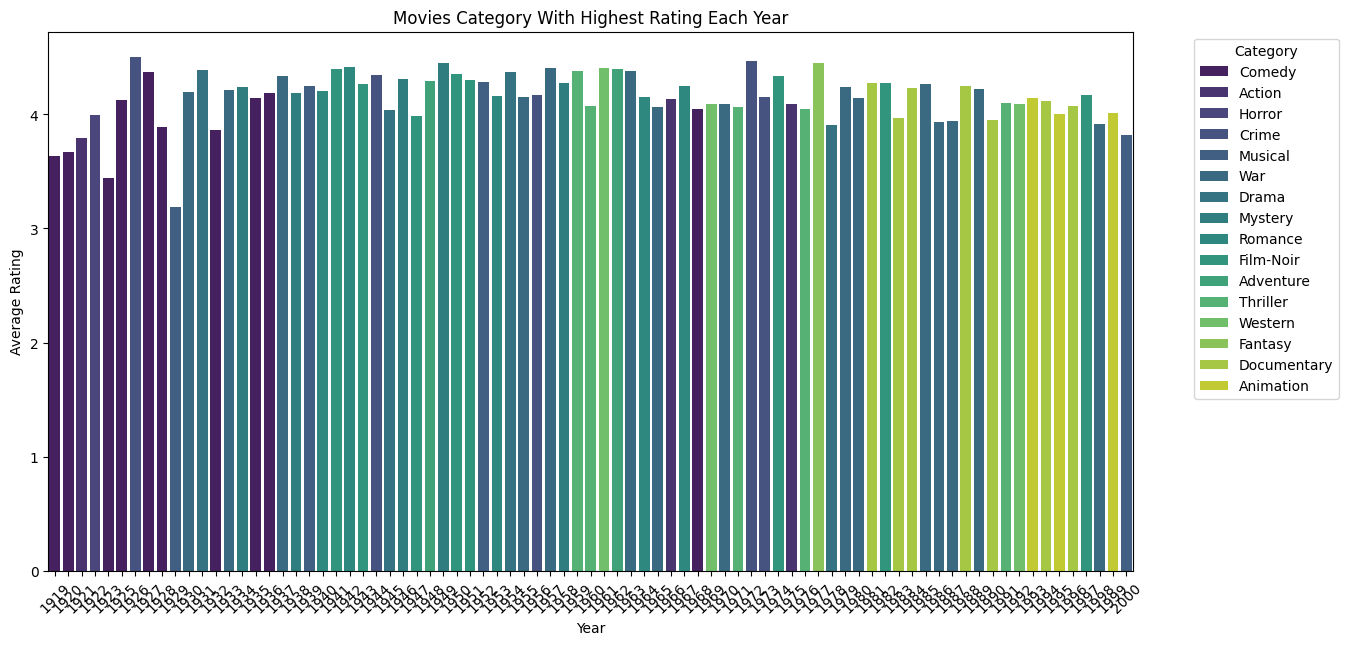

In [101]:
highest_Rating=ratings.merge(movies,on='MovieID')
highest_Rating=merged.groupby(['Year','Category'])['Rating'].mean().reset_index()
highest_Rating=highest_Rating.sort_values(['Year','Rating'],ascending=[True,False])
highest_Rating=highest_Rating.groupby('Year').first().reset_index()
highest_Rating.head(5)


plt.figure(figsize=(14,7))
sns.barplot(data=highest_Rating, x='Year',y='Rating',hue='Category',dodge=False,palette='viridis')
plt.title("Movies Category With Highest Rating Each Year")
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Category',bbox_to_anchor=(1.05,1),loc = 'upper left')
plt.show()


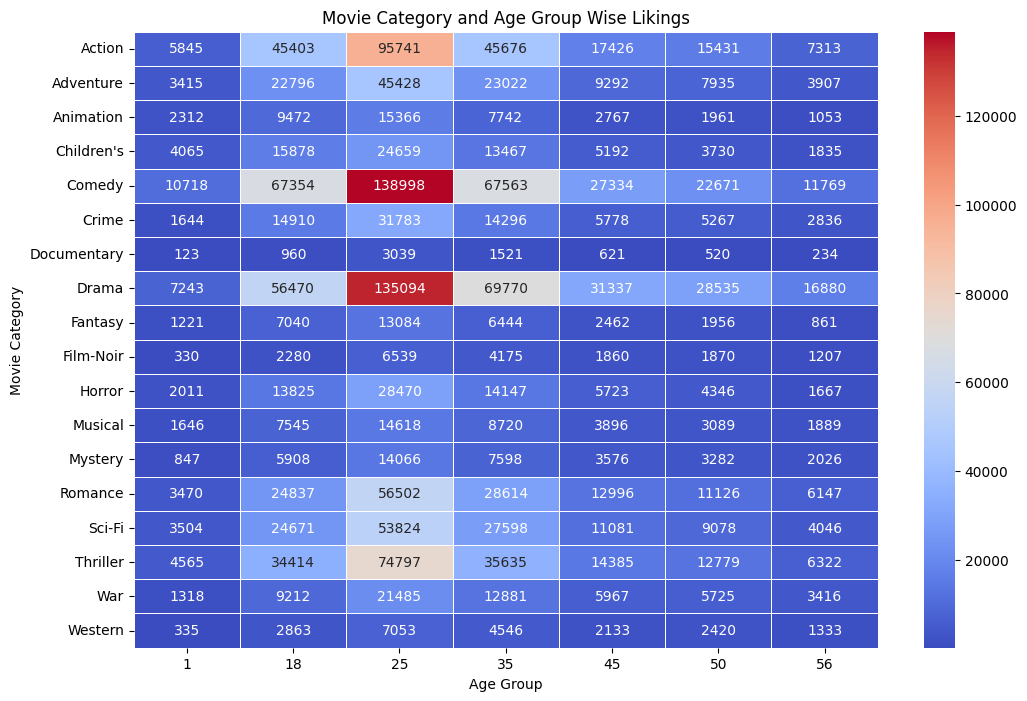

In [102]:
# Group by Category and Age and count the number of users
category_age_group_likes = ratings.merge(movies, on='MovieID')
category_age_group_likes = category_age_group_likes.merge(users, on='UserID')
category_age_group_likes = category_age_group_likes.groupby(['Category', 'Age'])['UserID'].count().unstack().fillna(0)

# Create a heatmap for movie category and age group wise likings
plt.figure(figsize=(12, 8))
sns.heatmap(category_age_group_likes, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5)
plt.title('Movie Category and Age Group Wise Likings')
plt.xlabel('Age Group')
plt.ylabel('Movie Category')
plt.show()


C:\Users\rs444\AppData\Local\Temp\ipykernel_8776\4137070803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_movie_count.index, y=yearly_movie_count.values, palette='Set2')


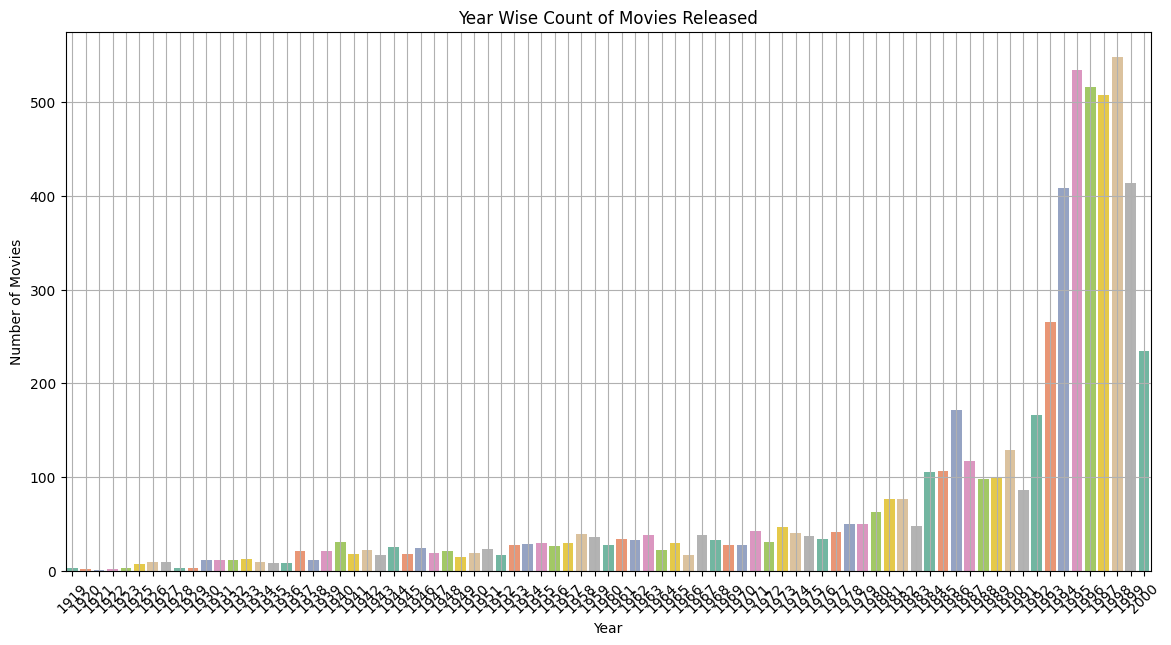

In [103]:

# Calculate the number of movies released each year
yearly_movie_count = movies['Year'].value_counts().sort_index()

# Create a bar plot for the year-wise count of movies released
plt.figure(figsize=(14, 7))
sns.barplot(x=yearly_movie_count.index, y=yearly_movie_count.values, palette='Set2')
plt.title('Year Wise Count of Movies Released')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\rs444\AppData\Local\Temp\ipykernel_8776\4137070803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_movie_count.index, y=yearly_movie_count.values, palette='Set2')


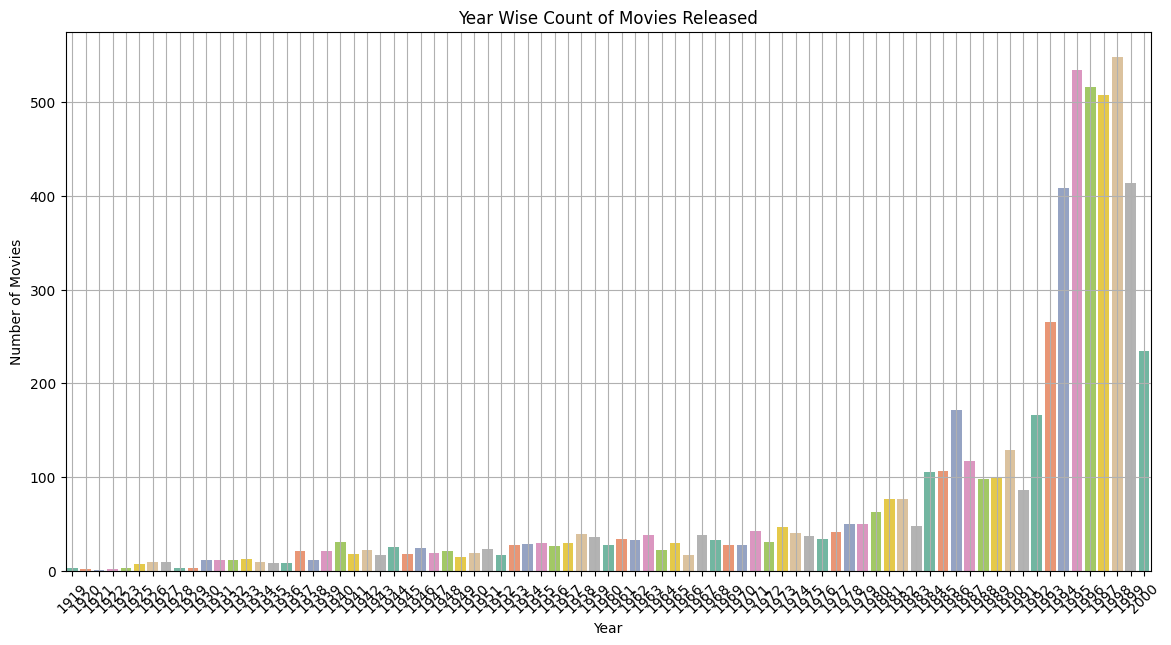

In [104]:

# Calculate the number of movies released each year
yearly_movie_count = movies['Year'].value_counts().sort_index()

# Create a bar plot for the year-wise count of movies released
plt.figure(figsize=(14, 7))
sns.barplot(x=yearly_movie_count.index, y=yearly_movie_count.values, palette='Set2')
plt.title('Year Wise Count of Movies Released')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
